# DATA SCIENCE 2 -ESEO DSMT 
### 8 Nov 2021  - Prof. R.Longo

### AdaBoosting  Basic Principles

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
points=[]
points.append([1,5])
points.append([5,5])
points.append([3,3])
points.append([1,1])
points.append([5,1])

Xtrain=np.array(points)
ytrain = np.array([1,1,-1,1,1]).reshape(Xtrain.shape[0],1)
print(ytrain)

[[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]


In [34]:
Xtest=np.array([[2.5, 3]])


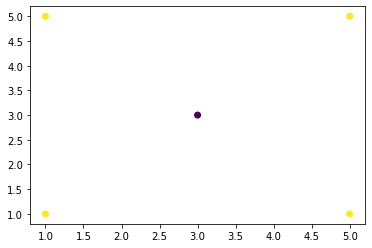

In [35]:
fig, ax = plt.subplots()
ax.scatter(Xtrain[:,0],Xtrain[:,1],c=ytrain);


In [36]:
def stumpClassify(dataMatrix,dimen,threshVal, threshIneq):
    retArray = np.zeros((dataMatrix.shape[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = 1
        retArray[dataMatrix[:,dimen] >= threshVal] = -1
    else:
        retArray[dataMatrix[:,dimen] >= threshVal] = 1.0
        retArray[dataMatrix[:,dimen] < threshVal] = -1.0
    return retArray

# AdaBoost Algorithm.
For Round t=1 ONLY

1. $w_i=\frac{1}{N}$ 

2. Calculate the Error Rate ($\epsilon$) for each weak Classifier:
    $\epsilon=\sum_{n=1}^{Nwrong} w_i$  (Error Rate)
3. Pick up the classifier with lowest error rate

4. Compute the Voting Power ($\alpha$) for the classifier: 
 $\alpha_1 = \frac{1}{2} ln(\frac{1-\epsilon}{\epsilon})$
 
5. Append the classifier in the Ensemble:
$H(x)= \alpha_1h_1(x_i)$

For Round t>1 
 
1. Update the weights for the training points using the , empathizing  the missclassified points by using the Error Rate of  the previous round:

 - if the point was correctly classified: $w_{n+1}=  \frac{1}{2} \frac{1}{1-\epsilon}*w_{n}$  -> the new weight associtated to the 1point will be smaller than the previous round
 - if the point was NOT correctly classified  $w_{n+1}=  \frac{1}{2} \frac{1}{\epsilon}*w_{n}$  -> the new weight associtated to the point will be bigger than the previous round
 
Repeat Steps
2. to 4.
 
5. Append the classifier in the Ensemble:
$H(x)=\sum_{t=1}^{T} \alpha_th_t(x_i)$

6. Make a prediction on a Test sample:
$\hat{H}(x)=sign(\sum_{t=1}^{T} \alpha_th_t(x_i))$

7. Stop here or start a new Round

 
 
 


In [52]:
def adaboostAlgorithm(N,w_i,threshVal,threshIneq,Xtrain,H=0):
        for i in threshVal: 
            errors = np.ones((N,1))
            ymodel = stumpClassify(dataMatrix=Xtrain,dimen=0,threshVal=i, threshIneq=threshIneq)
            errors[ymodel==ytrain]=0
            error_rate = w_i.T.dot(errors) #step 2
            print(error_rate)
            print(errors)
        return error_rate,errors
                
        

In [53]:
N = 5
w_i = np.ones((N,1))/N #step 1
threshVal = [2,4,6]
threshIneq = 'lt'
error_rate,errors = adaboostAlgorithm(5,w_i,threshVal,threshIneq,Xtrain)

error_rate = 0.2
alpha_1 = 0.5*np.log((1-error_rate)/error_rate)#step 4
print(alpha_1)
h1 = stumpClassify(dataMatrix=Xtest,dimen=0,threshVal=6,threshIneq=threshIneq)
H = alpha_1*h1

[[0.4]]
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]]
[[0.6]]
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]
[[0.2]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
0.6931471805599453


In [55]:
error_rate = 0.2
threshVal = [2,4,6]
threshIneq = 'lt'
w2 = np.array([w_i[0]*0.5/(1-error_rate),w_i[1]*0.5/(1-error_rate),w_i[2]*0.5/(error_rate),w_i[3]*0.5/(1-error_rate),w_i[4]*0.5/(1-error_rate)])
adaboostAlgorithm(5,w2,threshVal,threshIneq,Xtrain)

[[0.25]]
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]]
[[0.75]]
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]
[[0.5]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


(array([[0.5]]),
 array([[0.],
        [0.],
        [1.],
        [0.],
        [0.]]))